In [1]:
words = open('names.txt', 'r').read().splitlines()

In [2]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [3]:
min(len(w) for w in words)

2

In [4]:
max(len(w) for w in words)

15

In [5]:
#Bigram
##count the ccombinations
b = {}
for w in words:
    chs = ['<S>'] + list(w) +['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1


In [6]:
sorted(b.items(), key= lambda kv: -kv[1])

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [7]:
import torch

In [8]:
N = torch.zeros((27,27), dtype=torch.int32)

In [9]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0

In [10]:

for w in words:
    chs = ['.'] + list(w) +['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1 

In [ ]:
itos = {i:s for s,i in stoi.items()}

In [ ]:
N += 1
#model smoothing adding one to avoid -infinity in negative log likehood

(-0.5, 26.5, 26.5, -0.5)

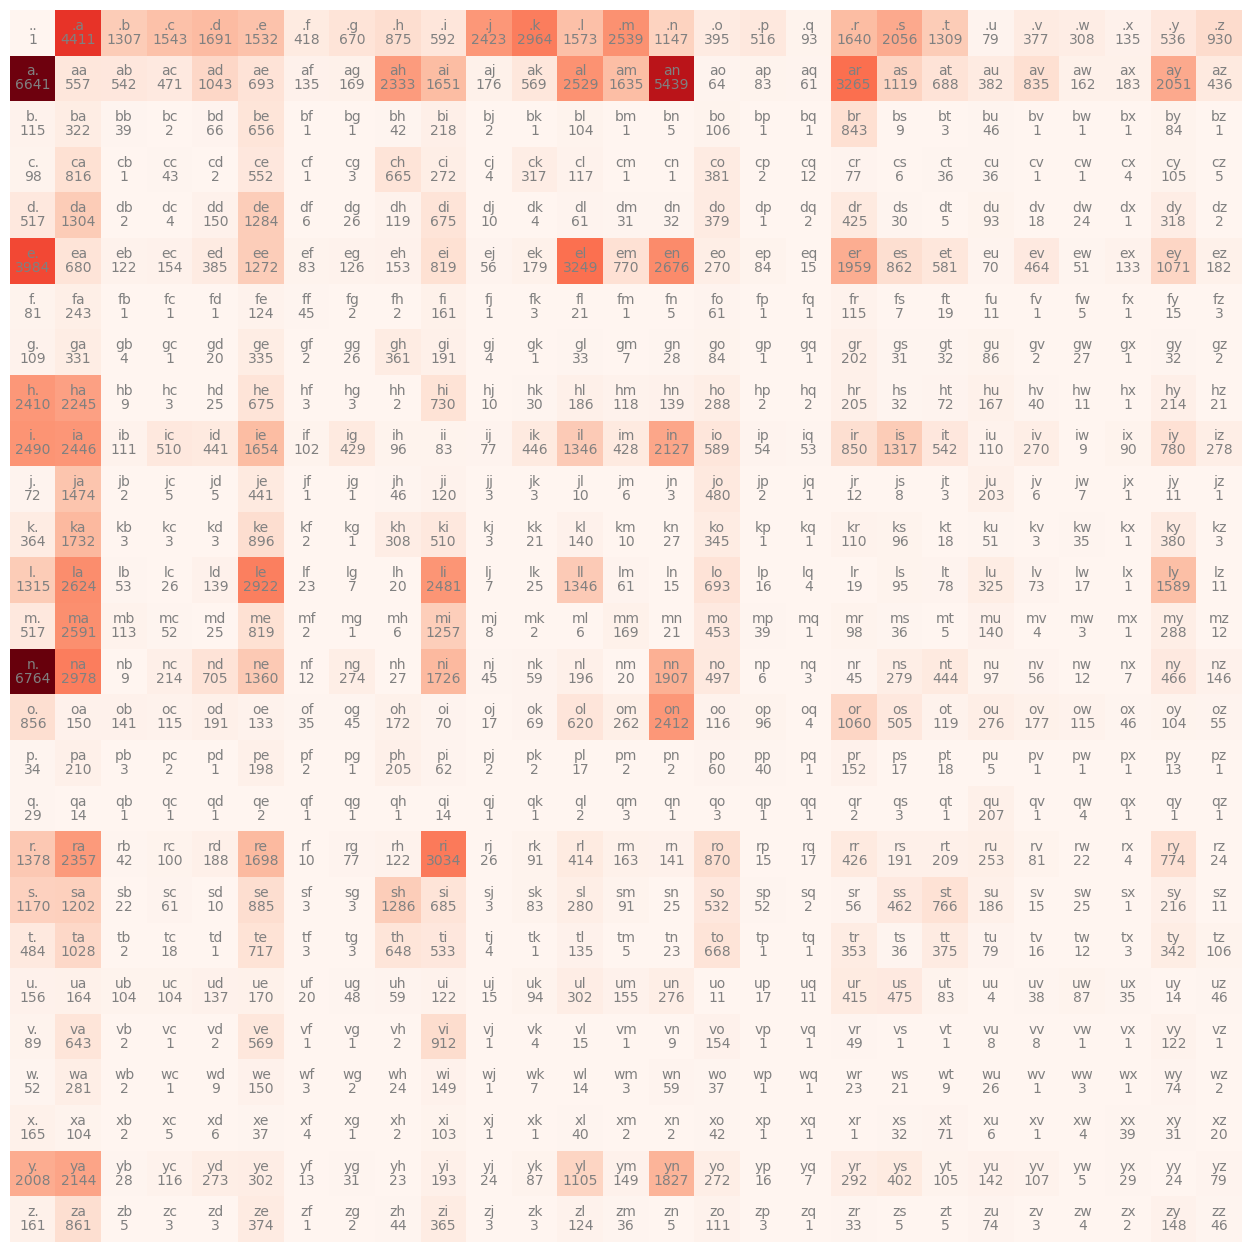

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Reds')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha='center', va='bottom',  color='gray')
        plt.text(j, i, N[i,j].item(), ha='center', va='top',  color='gray')
plt.axis('off')

In [ ]:
N[0]

tensor([   1, 4411, 1307, 1543, 1691, 1532,  418,  670,  875,  592, 2423, 2964,
        1573, 2539, 1147,  395,  516,   93, 1640, 2056, 1309,   79,  377,  308,
         135,  536,  930], dtype=torch.int32)

In [ ]:
p = N[0].float()
p = p/p.sum()
p.sum()

tensor(1.)

In [ ]:
itos

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

In [ ]:
P = N.float()
P /= P.sum(1, keepdim=True)


In [ ]:
g = torch.Generator().manual_seed(2147483647)
for i in range(50):
    out = []
    ix = 0
    while True:
        p = P[ix]
        # p = N[ix].float()
        # p = p/p.sum()

        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print(''.join(out))

mor.
axx.
minaymoryles.
kondlaisah.
anchshizarie.
odaren.
iaddash.
h.
jhinatien.
egushl.
h.
br.
a.
jayn.
ilemannariaenien.
be.
f.
akiinela.
trttanakeroruceyaaxatona.
lamoynayrkiedengin.
torrederahnn.
ellovyllobrqura.
ay.
h.
kn.
jaieendenelele.
kianu.
eryly.
zeeieil.
kayvirgjusinn.
r.
t.
rja.
kronanurolin.
din.
elfr.
dikie.
s.
elarieiavelvalllaish.
eythann.
janianaeri.
ble.
ckiree.
l.
adhanoena.
naisaryan.
sialaitalyee.
cena.
lisarr.
bizyngor.


In [ ]:
log_likehood = 0.0
count = 0.0
for w in ['qwertaq']:#words:
    chs = ['.'] + list(w) +['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        log_likehood +=  torch.log(P[stoi[ch1], stoi[ch2]])
        count += 1
average = -log_likehood/count
print(f'{average=}')


average=tensor(3.6015)


In [ ]:
#create the training set of bigrams(X, y)
xs, ys = [], []

for w in words[:1]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)


In [ ]:
import torch.nn.functional as F

In [ ]:
xenc = F.one_hot(xs, num_classes=27).float()
xenc.shape

torch.Size([5, 27])

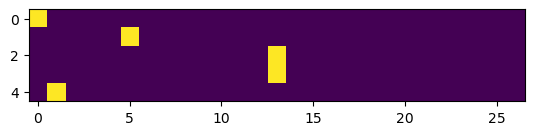

In [ ]:

plt.imshow(xenc)
# plt.show()

In [ ]:
W = torch.randn((27, 27))
torch.matmul(xenc, W)

tensor([[ 1.5596,  2.2169, -0.2817, -1.2745, -0.9292,  0.9377, -2.1394, -0.1754,
          0.7369,  0.8005,  1.1436, -1.2058, -1.7473, -0.8378,  1.1236,  0.0906,
          1.0624, -0.1909, -0.9996, -0.1057,  0.1194, -0.0797, -0.7652,  0.7147,
          0.8087, -1.7042,  1.5184],
        [-1.2753, -0.0832, -0.0411,  1.9590, -1.1081,  2.0920,  1.6922, -0.5215,
          1.1678,  0.1325, -0.5150, -0.8950,  0.0987, -0.0645,  2.3221, -0.5773,
          1.0277, -0.1533,  0.5776,  0.6996, -1.0179,  0.4544, -0.9772, -1.1877,
         -0.2896, -0.4581, -0.6785],
        [-0.3973, -1.0122,  0.9212, -0.5171,  1.5093,  1.3972, -1.4000,  1.0110,
         -0.1664, -0.1938,  0.2122,  3.9322, -0.7671, -0.4374, -0.8064, -0.3106,
         -0.3845,  1.1610,  0.4049, -1.1030,  1.1847, -0.3440, -1.1777,  1.0158,
         -0.2647,  0.1333,  0.3119],
        [-0.3973, -1.0122,  0.9212, -0.5171,  1.5093,  1.3972, -1.4000,  1.0110,
         -0.1664, -0.1938,  0.2122,  3.9322, -0.7671, -0.4374, -0.8064, -0.3106

In [ ]:
xenc @ W

tensor([[ 1.5596,  2.2169, -0.2817, -1.2745, -0.9292,  0.9377, -2.1394, -0.1754,
          0.7369,  0.8005,  1.1436, -1.2058, -1.7473, -0.8378,  1.1236,  0.0906,
          1.0624, -0.1909, -0.9996, -0.1057,  0.1194, -0.0797, -0.7652,  0.7147,
          0.8087, -1.7042,  1.5184],
        [-1.2753, -0.0832, -0.0411,  1.9590, -1.1081,  2.0920,  1.6922, -0.5215,
          1.1678,  0.1325, -0.5150, -0.8950,  0.0987, -0.0645,  2.3221, -0.5773,
          1.0277, -0.1533,  0.5776,  0.6996, -1.0179,  0.4544, -0.9772, -1.1877,
         -0.2896, -0.4581, -0.6785],
        [-0.3973, -1.0122,  0.9212, -0.5171,  1.5093,  1.3972, -1.4000,  1.0110,
         -0.1664, -0.1938,  0.2122,  3.9322, -0.7671, -0.4374, -0.8064, -0.3106,
         -0.3845,  1.1610,  0.4049, -1.1030,  1.1847, -0.3440, -1.1777,  1.0158,
         -0.2647,  0.1333,  0.3119],
        [-0.3973, -1.0122,  0.9212, -0.5171,  1.5093,  1.3972, -1.4000,  1.0110,
         -0.1664, -0.1938,  0.2122,  3.9322, -0.7671, -0.4374, -0.8064, -0.3106